### Exploring Kickoff Data
Sean Steinle

1. [Introduction](#1)
2. [Exploratory Data Analysis](#2)
    - [Statistics](#2a)
    - [Issues](#2b)

<a id='1'>

### Introduction

**A Foreword: generate_DF.py**
First, I should mention how we got to the data we have here. Most of the data scraping that creates the kickoff dataframe can be seen in *pbp_boxscores.ipynb*. This *generate_DF.py* file is a Python script that runs the *make_DF* function over a directory of ten csv files that contain boxscores of NFL games for each year of the 2010's. As such, the code that is unique to that script is generally working in reading in the different files, with a few notable exceptions. First, when reading in a csv, I added a column to the dataframe that kept track of which season the kickoff occurred during. This information is easily obtained by searching the filename string for four consecutive numbers. There are a number of other small changes I made, feel free to check them out yourself!

After running the generate_DF.py script, we now have a CSV file of around 28,000 kickoffs. This should be enough to make some basic observations about kickoffs over the past 10 years. In the next section, we'll use measures of central tendancy, graphs, and other measurements in order to come to some conclusions about kickoffs over the past decade.
<a id='2'>

### Exploratory Data Analysis

***Statistics***

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [2]:
df = pd.read_csv("kickoff_dataset.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'kicking_team', 'receiving_team', 'year', 'text',
       'kicker', 'isTouchback', 'isOutOfBounds', 'isOnside', 'isFairCatch',
       'kickYards', 'kickStart', 'kickLand', 'returner', 'tacklers',
       'returnYards', 'returnSpot', 'isReturned', 'isAdvanced', 'isTouchdown',
       'isMuff', 'retainsMuff', 'isPenalty', 'penalizedPlayer', 'penaltyYards',
       'penaltyType', 'penaltySpot', 'isFumble', 'retainsFumble', 'finalSpot'],
      dtype='object')

In [4]:
print(f"We've tracked {len(df.columns)-1} statistics over {len(df)} kickoffs. Here's a glimpse of the dataset:")
df.head()

We've tracked 29 statistics over 28315 kickoffs. Here's a glimpse of the dataset:


,Unnamed: 0,kicking_team,receiving_team,year,text,kicker,isTouchback,isOutOfBounds,isOnside,isFairCatch,...,isMuff,retainsMuff,isPenalty,penalizedPlayer,penaltyYards,penaltyType,penaltySpot,isFumble,retainsFumble,finalSpot
0,5,PIT,TEN,2009,J.Reed kicks 61 yards from PIT 30 to TEN 9. J....,J.Reed,False,False,False,False,...,False,True,True,G.McRath,10,Offensive Holding,72,False,True,82
1,15,MIN,CLE,2009,R.Longwell kicks 66 yards from MIN 30 to CLE 4...,R.Longwell,False,False,False,False,...,False,True,True,K.Maiava,10,Offensive Holding,71,False,True,81
2,45,NYJ,HOU,2009,J.Feely kicks 72 yards from NYJ 30 to HOU -2. ...,J.Feely,False,False,False,False,...,False,True,True,C.Thompson,10,Offensive Holding,70,False,True,80
3,47,NYJ,HOU,2009,J.Feely kicks 71 yards from NYJ 30 to HOU -1. ...,J.Feely,False,False,False,False,...,False,True,True,C.Thompson,10,Unnecessary Roughness,80,False,True,90
4,48,HOU,NYJ,2009,K.Brown kicks 67 yards from HOU 30 to NYJ 3. L...,K.Brown,False,False,False,False,...,False,True,True,J.Westerman,10,Offensive Holding,77,False,True,87


In [10]:
df.columns

Index(['Unnamed: 0', 'kicking_team', 'receiving_team', 'year', 'text',
       'kicker', 'isTouchback', 'isOutOfBounds', 'isOnside', 'isFairCatch',
       'kickYards', 'kickStart', 'kickLand', 'returner', 'tacklers',
       'returnYards', 'returnSpot', 'isReturned', 'isAdvanced', 'isTouchdown',
       'isMuff', 'retainsMuff', 'isPenalty', 'penalizedPlayer', 'penaltyYards',
       'penaltyType', 'penaltySpot', 'isFumble', 'retainsFumble', 'finalSpot'],
      dtype='object')

35

35

True

{'ARI',
 'ATL',
 'BAL',
 'BUF',
 'CAR',
 'CHI',
 'CIN',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GB',
 'HOU',
 'IND',
 'JAC',
 'JAX',
 'KC',
 'LA',
 'LAC',
 'MIA',
 'MIN',
 'NE',
 'NO',
 'NYG',
 'NYJ',
 'OAK',
 'PHI',
 'PIT',
 'SD',
 'SEA',
 'SF',
 'STL',
 'TB',
 'TEN',
 'WAS'}

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

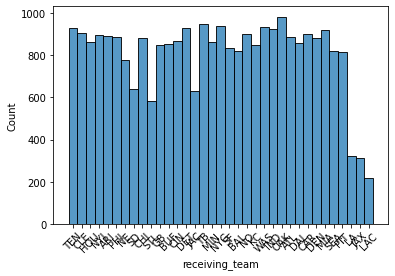

In [65]:
#Kicking and Receiving Teams
len(set(df["kicking_team"]))
len(set(df["receiving_team"]))
set(df["kicking_team"]) == set(df["receiving_team"])
set(df["receiving_team"])
plot = sns.histplot(data=df, x="receiving_team")
plt.xticks(rotation=45)
#So, we have 35 teams. We know there are only 30. What's the anomaly? This data is over ten years, so we have leftover
#abbreviations like STL, LA, JAC, SD, OAK, etc. You can see this borne out in that the smallest bars are new name changes.

<AxesSubplot:xlabel='year', ylabel='count'>

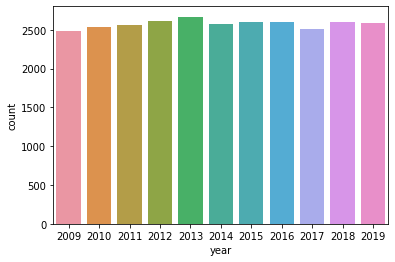

In [84]:
#Years
sns.countplot(data=df, x="year")

#This looks good! You wouldn't expect any one year to have more than another.

In [85]:
#isTouchback, isOutOfBounds, isOnside, isFairCatch, isReturned, isTouchdown, isMuff, isPenalty, isFumble
touchback = len(df[df["isTouchback"]])/len(df)
print(f"{touchback*100}% of kicks were touchbacks.")

oob = len(df[df["isOutOfBounds"]])/len(df)
print(f"{oob*100}% of kicks were out of bounds.")

fc = len(df[df["isFairCatch"]])/len(df)
print(f"{fc*100}% of kicks were fair catches.")

returned = len(df[df["isReturned"]])/len(df)
print(f"{returned*100}% of kicks were returned.")

td = len(df[df["isTouchdown"]])/len(df)
print(f"{td*100}% of kicks were returned for a touchdown.")

muff = len(df[df["isMuff"]])/len(df)
print(f"{muff*100}% of kicks were muffed.")

penalty = len(df[df["isPenalty"]])/len(df)
print(f"{penalty*100}% of kickoffs had an accepted penalty.")

fumble = len(df[df["isFumble"]])/len(df)
print(f"{fumble*100}% of kicks were fumbled.")

#These numbers look to be about right. One immediate comparison we can do is fumbles lost vs. touchdowns.

46.40649832244394% of kicks were touchbacks.
1.161928306551298% of kicks were out of bounds.
0.1553946671375596% of kicks were fair catches.
51.66166342927777% of kicks were returned.
0.42733533462828893% of kicks were returned for a touchdown.
0.8935193360409677% of kicks were muffed.
4.043793042556949% of kickoffs had an accepted penalty.
1.0665724880805227% of kicks were fumbled.


***Issues***
1. The *finalSpot* statistic is incorrect for a portion of the dataset. Since there is no line in boxscore descriptions that contains the final spotting of the ball, we have to construct this statistic. This calculation is sometimes very simple--for touchbacks, it's as easy as just saying "25 yards". On the other hand, it can get very complicated: consider an example where there is a penalty, fumbled ball, recovered ball, and then another penalty. I'm not sure what I'm going to do with this statistic at this time.
2. The *kickLand* statistic is also out of wack, but for reasons more unclear than *finalSpot*. About 80% of kicks land exactly on the goal line, according to our database. However, we know that this cannot possibly be. In fact, upon watching football and following along with the ESPN app, I saw a >65 yard kick be reported as "65 yards, Touchback". When we consider that we see the exact same pattern for all of the touchbacks in our data (which make up about half of the dataframe), we must assume that any touchback is reported as landing on the goal line. Let's test this theory. TEST.